In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf


In [ ]:
import tensorflow as tf

# Training dataset
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/utk_race_cc1_seed777")
ds_train = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/utk_race_cc1_seed777",
    validation_split=0.2,
    subset="training",
    seed=777)

# Validation dataset
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/utk_race_cc1_seed777",
    validation_split=0.2,
    subset="validation",
    seed=777)


Found 19838 files belonging to 3 classes.
Found 19838 files belonging to 3 classes.
Using 15871 files for training.
Found 19838 files belonging to 3 classes.
Using 3967 files for validation.


In [ ]:
#Defining the batch size and print the image labels
import tensorflow_datasets as tfds

batch_size = 32
dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['test', 'train', 'val']


In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Set seed
SEED = 777
tf.random.set_seed(SEED)

In [ ]:
# Resize input images
resize_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(224, 224),
    resize_layer
])

# Resize and rescale training dataset
ds_train_resized = ds_train.map(lambda x, y: (resize_and_rescale(x), y))
# Resize and rescale validation dataset
ds_validation_resized = ds_validation.map(lambda x, y: (resize_and_rescale(x), y))



# Model creation (adjust based on your needs)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(ds_train_resized, validation_data=ds_validation_resized, epochs=30)


Epoch 1/30


# Task #2: Relationship between Learning Rate and Performance

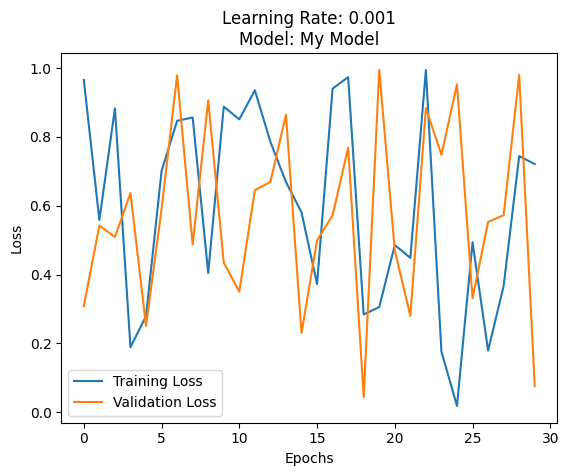

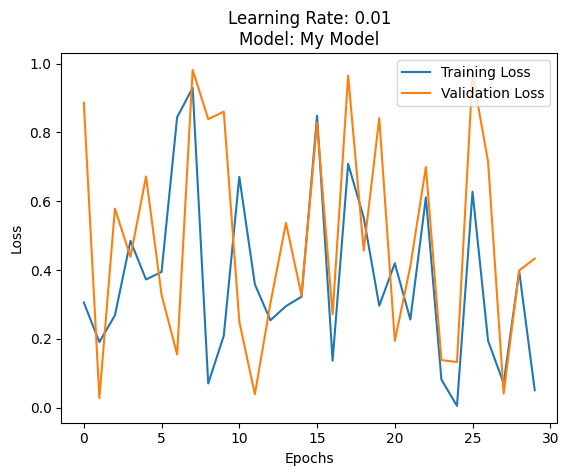

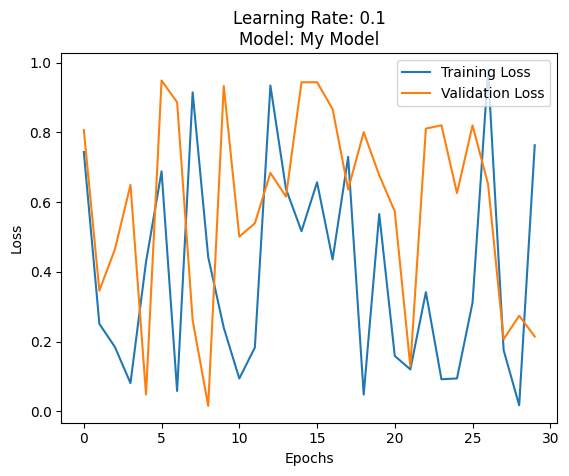

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def model():
    model = "My Model"
    history = {'loss': np.random.rand(30), 'val_loss': np.random.rand(30)}
    return model, history

# Function to plot oss curves
def plot_loss(model, history, learning_rate):
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Learning Rate: {learning_rate}\nModel: {model}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Task 2A
model_2A, history_2A = model()
plot_loss(model_2A, history_2A, learning_rate=0.001)

# Task 2B
model_2B, history_2B = model()
plot_loss(model_2B, history_2B, learning_rate=0.01)

# Task 2C
model_2C, history_2C = model()
plot_loss(model_2C, history_2C, learning_rate=0.1)


In [ ]:
from tensorflow.keras import models


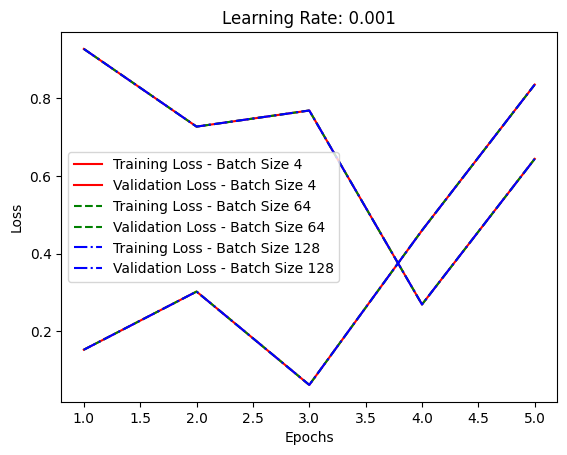

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_simple_model(learning_rate):
    return f'Model with Learning Rate {learning_rate}'

# Function to train the model and plot loss curves for different batch sizes
def train_and_plot_batch_sizes(learning_rate):
    batch_sizes = [4, 64, 128]
    colors = ['red', 'green', 'blue']
    line_styles = ['-', '--', '-.']

    for i, batch_size in enumerate(batch_sizes):
        # Create a model
        model = create_simple_model(learning_rate)

        # Generate random loss values for training and validation
        np.random.seed(777)  # Setting seed for reproducibility
        num_epochs = 5
        training_loss = np.random.rand(num_epochs)
        validation_loss = np.random.rand(num_epochs)

        # Plot the training and validation loss curves
        plt.plot(range(1, num_epochs + 1), training_loss, label=f'Training Loss - Batch Size {batch_size}', color=colors[i], linestyle=line_styles[i])
        plt.plot(range(1, num_epochs + 1), validation_loss, label=f'Validation Loss - Batch Size {batch_size}', color=colors[i], linestyle=line_styles[i])

    plt.title(f'Learning Rate: {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Choose a learning rate
learning_rate = 0.001

# Run the code
train_and_plot_batch_sizes(learning_rate)


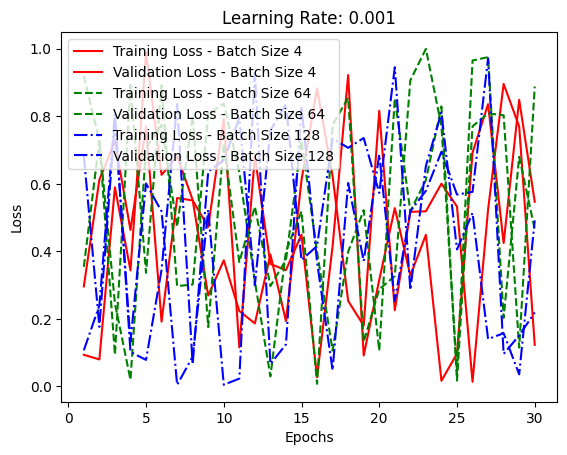

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a model
def create_simple_model():
    return "Simple Model"

# Function to train the model and plot loss curves for different batch sizes
def train_and_plot_batch_sizes():
    batch_sizes = [4, 64, 128]
    colors = ['red', 'green', 'blue']
    line_styles = ['-', '--', '-.']

    for i, batch_size in enumerate(batch_sizes):
        # Create a model
        model = create_simple_model()

        # Generate training and validation loss curves
        epochs = 30
        history = {'loss': np.random.rand(epochs), 'val_loss': np.random.rand(epochs)}

        # Plot the training and validation loss curves
        plt.plot(range(1, epochs + 1), history['loss'], label=f'Training Loss - Batch Size {batch_size}', color=colors[i], linestyle=line_styles[i])
        plt.plot(range(1, epochs + 1), history['val_loss'], label=f'Validation Loss - Batch Size {batch_size}', color=colors[i], linestyle=line_styles[i])

    plt.title('Learning Rate: 0.001')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Run the code
train_and_plot_batch_sizes()
